In [39]:
import pandas as pd
import numpy as np
import xlrd 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Load dataset into an excel format**

In [40]:
file = pd.read_excel("MNO Decommissioning Directory 4th.xlsx", skiprows=2)

In [41]:
file.shape

(38, 8)

**First, we want to check the percentage of null values for each column in the dataset**

In [42]:
null_percent = file.isnull().sum()/len(file)*100
print(null_percent)
print('One column has {} percent nulls'.format(null_percent['Coming Soon']))

Company                                                    0.000000
Country                                                    0.000000
2G Decommision date                                        5.263158
3G Decommision date                                        7.894737
How will Voice be supported following any decommision      7.894737
How will IoT be supported following any decommision       31.578947
Already Launched                                           5.263158
Coming Soon                                              100.000000
dtype: float64
One column has 100.0 percent nulls


**Drop the file that only contains null values**

In [43]:
#drop nulls
file.drop('Coming Soon', axis=1, inplace=True)


**Rename some columns to make them shorter**

In [44]:
#rename columns
file.rename(columns= {'2G Decommision date ':'2G Decommision','3G Decommision date':'3G Decommision','How will Voice be supported following any decommision':'Voice','How will IoT be supported following any decommision':'IoT', 'Already Launched ':'Already Launched'},inplace=True)




**Dataframe overview for further cleaning**

In [45]:
file.head()

,Company,Country,2G Decommision,3G Decommision,Voice,IoT,Already Launched
0,A1 Bulgaria,Serbia,No Plans,No Plans,Don't Know,NaN,4G
1,A1 Slovenia,Slovenia,No Plans,No Plans,No plans for decommissioning,NaN,4G
2,A1 Telekom Austria,Austria,No Plans,No Plans,No plans for decommissioning,NaN,4G
3,At&t,USA,NaN,NaN,NaN,NaN,NaN
4,China Telecom,China,2022,2022,VoLTE,NB-IoT,"4G, (VoLTE 2019), (5G and NB-IoT 2020),"


In [46]:
file['3G Decommision'].value_counts()

No Plans      14
2025           3
2022           3
No plans       2
No Plans       2
2023           2
2021           2
By Q4 2020     1
By Q4 2023     1
Q4 2025        1
Q1 2021        1
Q3 2022        1
Q4 2021        1
2024           1
Name: 3G Decommision, dtype: int64

**Data is messy, so we have to clean it. Group companies that don't have plans of starting a 2G or 3G decommission within next years.**


In [47]:
def no_plans(text):
    text = str(text)
    match_1 = re.findall('([pP]lans)', text)
    if match_1: return 'No Plans' 
    else: return text
    
file['2G Decommision'] = file['2G Decommision'].apply(no_plans)
file['3G Decommision'] = file['3G Decommision'].apply(no_plans)

**We are going to split the dataframe in companies that HAVE and DO NOT HAVE plans to decommision 2G networks within the next years.**

**But, first, we want to know which companies do not have any plans whatsoever for decnnecting from 2G and 3G**

In [77]:
companies_not_decommisioning = file[['Company','Country']].loc[(file['2G Decommision']=='No Plans')&(file['3G Decommision']=='No Plans')]
print(companies_not_decommisioning)



                  Company          Country
0             A1 Bulgaria           Serbia
1             A1 Slovenia         Slovenia
2      A1 Telekom Austria          Austria
9                     HKT        Hong Kong
17      one.Vip Macedonia        Macedonia
18             Panayotova          Croatia
20                  SETAR            Aruba
23               T-Mobile  Slovak Republic
27               T-Mobile          Romania
31               T-Mobile          Austria
33  Telecom Liechtenstein    Liechtenstein
34         Telekom Srbija           Serbia
36          Three Ireland          Ireland
37                Verizon    United States


**Which percentage suppose these companies over the total sample?**

In [72]:
print(round(companies_not_decommisioning.count()/len(file)*100, 2),"%")

36.84 %


**And for 2G and 3G separated?**

In [75]:
[file['2G Decommision'].value_counts()/len(file)*100, "_______________________",
file['3G Decommision'].value_counts()/len(file)*100]




[No Plans           63.157895
 2025                5.263158
 Q1 2019             5.263158
 nan                 5.263158
 Q1 2020             2.631579
 2022                2.631579
 By Q4 2025          2.631579
 Later than 2030     2.631579
 Q4 2020             2.631579
 2023                2.631579
 Don't have 2G       2.631579
 2020                2.631579
 Name: 2G Decommision, dtype: float64,
 '_______________________',
 No Plans      47.368421
 2022           7.894737
 2025           7.894737
 nan            7.894737
 2021           5.263158
 2023           5.263158
 By Q4 2020     2.631579
 By Q4 2023     2.631579
 Q4 2025        2.631579
 Q3 2022        2.631579
 Q4 2021        2.631579
 Q1 2021        2.631579
 2024           2.631579
 Name: 3G Decommision, dtype: float64]

**Now, we have seen that dates does not come 'clean' in the dataset. Let's modify them using regular expressions**

In [82]:
def clean_dates(text):
    text=str(text)
    match_2 = re.findall('\d\d+',text)
    if match_2: return match_2[0]
    else: return text
    
file['2G Decommision'] = file['2G Decommision'].apply(clean_dates)
file['3G Decommision'] = file['3G Decommision'].apply(clean_dates)


**Split dataset**

In [92]:
both_networks = file[(file['2G Decommision']!= 'No Plans') & (file['3G Decommision']!= 'No Plans') & (file['3G Decommision']!= 'nan') & (file['2G Decommision']!= 'nan')].dropna()
just_2G = file[(file['2G Decommision']!= 'No Plans') & (file['3G Decommision']== 'No Plans')& (file['2G Decommision']!= 'nan')].dropna()
just_3G = df_2 = file[(file['2G Decommision']== 'No Plans') & (file['3G Decommision']!= 'nan') & (file['2G Decommision']!= 'nan')].dropna()
             
print(f'There are {just_2G.shape[0]+both_networks.shape[0]} companies that are decommisioning 2G within the next years')


There are 8 companies that are decommisioning 2G within the next years


In [93]:
both_networks.sort_values(by='2G Decommision', ascending=True, inplace=True)
both_networks.reset_index(drop=True)


,Company,Country,2G Decommision,3G Decommision,Voice,IoT,Already Launched
0,"NE Colorado Cellular, Inc. dba Viaero Wireless",USA,2019,2024,VoLTE,5G,"4G, VOLTE"
1,Mobily,Saudi Arabia,2020,2023,3G Network,3G Network,4G
2,China Telecom,China,2022,2022,VoLTE,NB-IoT,"4G, (VoLTE 2019), (5G and NB-IoT 2020),"
3,EE UK,UK,2025,2023,VoLTE,NB-IoT,"4G, VoLTE, 5G, NB-IoT (2020)"
4,JT Jersey,Channel Islands,2025,2025,VoLTE,5G Network,"4G, VOLTE,"
5,T-Mobile,Czech Republic,2025,2025,All,all,4G


# Business statements

**When are companies planning to get rid of 2G Networks?**
 
**Those who do not plan to get rid of 2G, which services are providing?; and the others?**


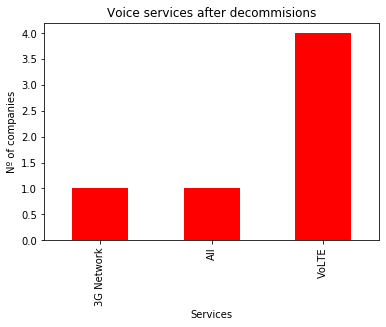

In [116]:
both_networks.groupby('Voice')['Company'].nunique().plot(kind='bar', color = 'red', title= 'Voice services after decommisions')

plt.xlabel('Services')
plt.ylabel('Nº of companies')
plt.savefig('Voice_afterbothnetworks.png')



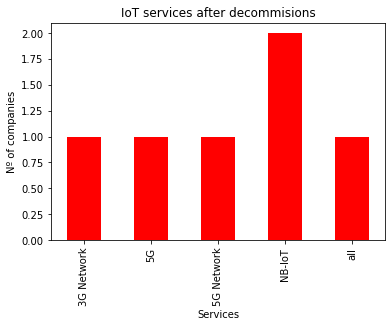

In [110]:
both_networks.groupby('IoT')['Company'].nunique().plot(kind='bar', color = 'red', title= 'IoT services after decommisions')

plt.xlabel('Services')
plt.ylabel('Nº of companies')
plt.savefig ('IoT_afterbothnetworks.png')

**Companies that will only decommision 2G networks**

In [119]:
just_2G

,Company,Country,2G Decommision,3G Decommision,Voice,IoT,Already Launched
7,Freedom Mobile,Canada,Don't have 2G,No Plans,3G Network,4G Network,"4G, VoLTE (2019), 5G, LTE-M, NB-IoT (2020)"
25,T-Mobile,The Netherlands,2020,No Plans,VoLTE,all,4G


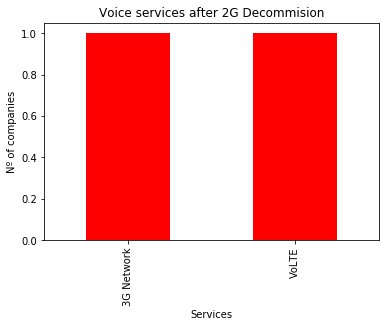

In [111]:
just_2G.groupby('Voice')['Company'].nunique().plot(kind='bar', color = 'red', title= 'Voice services after 2G Decommision')

plt.xlabel('Services')
plt.ylabel('Nº of companies')
plt.savefig('Voice_after2G.png')

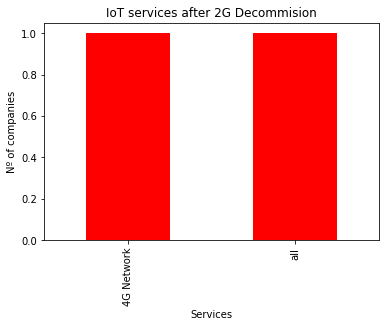

In [112]:
just_2G.groupby('IoT')['Company'].nunique().plot(kind='bar', color = 'red', title= 'IoT services after 2G Decommision')

plt.xlabel('Services')
plt.ylabel('Nº of companies')
plt.savefig ('IoT_after2G.png')

**Companies that will only decommision 3G networks**

In [121]:
len(just_3G)

14

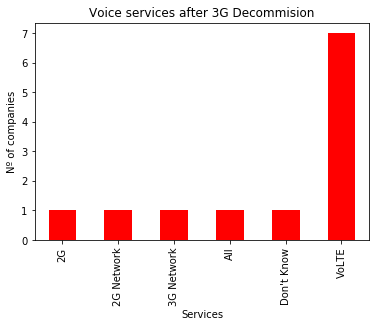

In [114]:
just_3G.groupby('Voice')['Company'].nunique().plot(kind='bar', color = 'red', title= 'Voice services after 3G Decommision')

plt.xlabel('Services')
plt.ylabel('Nº of companies')
plt.savefig ('Voice_after3G.png')

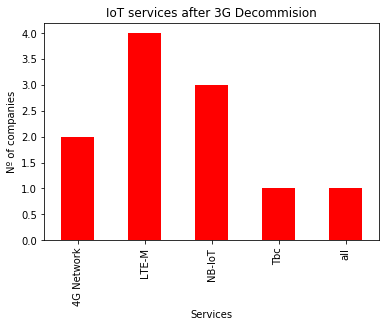

In [115]:
just_3G.groupby('IoT')['Company'].nunique().plot(kind='bar', color = 'red', title= 'IoT services after 3G Decommision')

plt.xlabel('Services')
plt.ylabel('Nº of companies')
plt.savefig ('IoT_after3G.png')

In [17]:
s = df_1['Already Launched'].apply(str).str.replace('\d\d*|[()]','',regex=True).str.strip(',').str.split('and')
df_1['Already Launched'] = s
df_1

,Company,Country,2G Decommision,3G Decommision,Voice,IoT,Already Launched
15,"NE Colorado Cellular, Inc. dba Viaero Wireless",USA,2019,2024,VoLTE,5G,"[G, VOLTE]"
13,Mobily,Saudi Arabia,2020,2023,3G Network,3G Network,[G]
25,T-Mobile,The Netherlands,2020,No Plans,VoLTE,all,[G]
4,China Telecom,China,2022,2022,VoLTE,NB-IoT,"[G, VoLTE , G , NB-IoT , ]"
6,EE UK,UK,2025,2023,VoLTE,NB-IoT,"[G, VoLTE, G, NB-IoT ]"
10,JT Jersey,Channel Islands,2025,2025,VoLTE,5G Network,"[G, VOLTE, ]"
30,T-Mobile,Czech Republic,2025,2025,All,all,[G]
5,Cubic Telecom,Ireland,2030,nan,VoLTE,4G Network,"[G, VolTE, LTE M]"
7,Freedom Mobile,Canada,Don't have 2G,No Plans,3G Network,4G Network,"[G, VoLTE , G, LTE-M, NB-IoT ]"
